In [1]:
# Import packages
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from utils.ml_utils import xy_split, encodeCategories

In [2]:
# Import data sets
rb_data = pd.read_csv(os.getcwd() + "/processed-data/rb-bust-data.csv")
wr_data = pd.read_csv(os.getcwd() + "/processed-data/wr-bust-data.csv")

In [3]:
# Select feature set
rb_DF = rb_data[['Age','ADP','TeamPosRank','PosAmbiguity','RookieSeason','SecondSeason','TopQB_ADP','Bust']]
wr_DF = wr_data[['Age','ADP','TeamPosRank','PosAmbiguity','RookieSeason','SecondSeason','TopQB_ADP','Bust']]

# Functions

In [4]:
def targetBalance(df):
    
    # Number of observations per target group
    print(f"Total Observations: {len(df)}")
    print(f"Bust = 0: {str(len(df[df.Bust == 0]))} observations")
    print(f"Bust = 1: {str(len(df[df.Bust == 1]))} observations")
    print(f"Fraction Busts: {round(len(df[df.Bust == 1]) / len(df), 3)}")

    
def featurePlot(df, rb_or_wr):
    
    # Set figure space
    plt.style.use('seaborn-white')
    set_color = 'steelblue'
    set_palette = ["#899DA4", "#C93312"]
    fig, axs = plt.subplots(7, 2, figsize=(15, 21), gridspec_kw={"hspace": 0.5, "wspace": 0.2})
    fig.suptitle(f'{rb_or_wr} Breakout Feature Distribution/Balance', fontsize=20, y=0.93)
    plots = [plot for ax in axs for plot in ax]
    
    # RB/WR-specific orders
    global order
    if rb_or_wr == 'RB':
        order = ['RB1', 'RB2', 'RB3']
    if rb_or_wr == 'WR':
        order = ['WR1', 'WR2', 'WR3']
    else:
        order = None

    # Subplots
    # Player Age
    sns.histplot(df['Age'], kde=False, bins=10, edgecolor='white', color=set_color, ax=plots[0])
    sns.kdeplot(data=df, x='Age', hue='Bust', linewidth=2.5, palette=set_palette, common_norm=False, ax=plots[1])

    # Player ADP
    sns.histplot(df['ADP'], kde=False, bins=10, edgecolor='white', color=set_color, ax=plots[2])
    sns.kdeplot(data=df, x='ADP', hue='Bust', linewidth=2.5, palette=set_palette, common_norm=False, ax=plots[3])

    # QB ADP
    sns.histplot(df['TopQB_ADP'], kde=False, bins=10, edgecolor='white', color=set_color, ax=plots[4])
    sns.kdeplot(data=df, x='TopQB_ADP', hue='Bust', linewidth=2.5, palette=set_palette, common_norm=False, ax=plots[5])

    # Team Position Rank
    sns.countplot(data=df, y='TeamPosRank', color=set_color, ax=plots[6])
    x, y = 'TeamPosRank', 'Bust'
    (df.groupby(x)[y]
     .value_counts(normalize=True).mul(100).rename('%').reset_index() # Normalize counts
     .pipe((sns.barplot,'data'), y=x, x='%', hue=y, order=order, edgecolor='white', palette=set_palette, ax=plots[7]))
    plots[7].set_xlim(0, 103)

    # Position Ambiguity
    sns.countplot(data=df, y='PosAmbiguity', color=set_color, order=[True, False], ax=plots[8])
    x, y = 'PosAmbiguity', 'Bust'
    (df.replace({True: 'True', False: 'False'}).groupby(x)[y]
     .value_counts(normalize=True).mul(100).rename('%').reset_index() # Normalize counts
     .pipe((sns.barplot,'data'), y=x, x='%', hue=y, order=['True', 'False'], edgecolor='white', palette=set_palette, ax=plots[9]))
    plots[9].set_xlim(0, 103)
    
    # Rookie Season
    sns.countplot(data=df, y='RookieSeason', color=set_color, ax=plots[10])
    x, y = 'RookieSeason', 'Bust'
    (df.replace({1: '1', 0: '0'}).groupby(x)[y]
     .value_counts(normalize=True).mul(100).rename('%').reset_index() # Normalize counts
     .pipe((sns.barplot,'data'), y=x, x='%', hue=y, order=['0', '1'], edgecolor='white', palette=set_palette, ax=plots[11]))
    plots[11].set_xlim(0, 103)
    
    # Rookie Season
    sns.countplot(data=df, y='SecondSeason', color=set_color, ax=plots[12])
    x, y = 'SecondSeason', 'Bust'
    (df.replace({1: '1', 0: '0'}).groupby(x)[y]
     .value_counts(normalize=True).mul(100).rename('%').reset_index() # Normalize counts
     .pipe((sns.barplot,'data'), y=x, x='%', hue=y, order=['0', '1'], edgecolor='white', palette=set_palette, ax=plots[13]))
    plots[13].set_xlim(0, 103)
    

# Target & Feature Set Balance/Distributions

In [5]:
# Sets color scheme
plt.style.use('seaborn')

## RB Busts

Total Observations: 214
Bust = 0: 179 observations
Bust = 1: 35 observations
Fraction Busts: 0.164


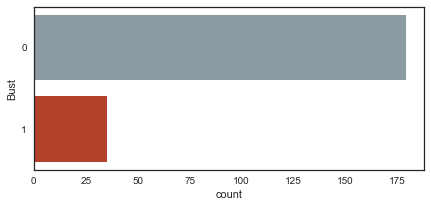

In [6]:
# Summary
targetBalance(rb_DF)

# Plot
plt.style.use('seaborn-white')
fig, axs = plt.subplots(1, 1, figsize=(7, 3))
sns.countplot(data=rb_DF, y='Bust', palette=["#899DA4", "#C93312"])
plt.show()

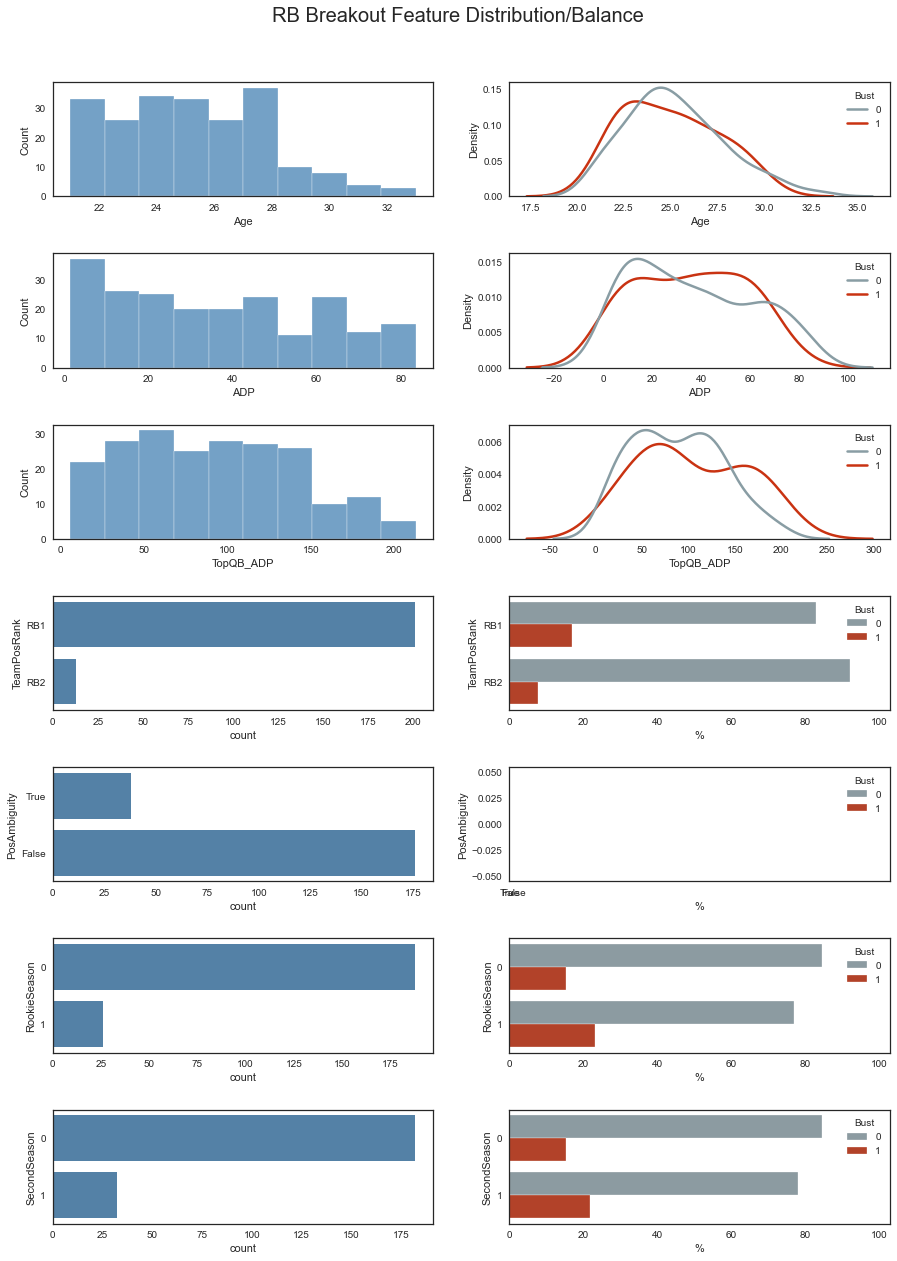

In [7]:
featurePlot(rb_DF, rb_or_wr='RB')

## WR Busts

Total Observations: 252
Bust = 0: 223 observations
Bust = 1: 29 observations
Fraction Busts: 0.115


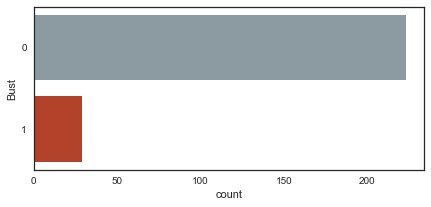

In [8]:
# Summary
targetBalance(wr_DF)

# Plot
plt.style.use('seaborn-white')
fig, axs = plt.subplots(1, 1, figsize=(7, 3))
sns.countplot(data=wr_DF, y='Bust', palette=["#899DA4", "#C93312"])
plt.show()

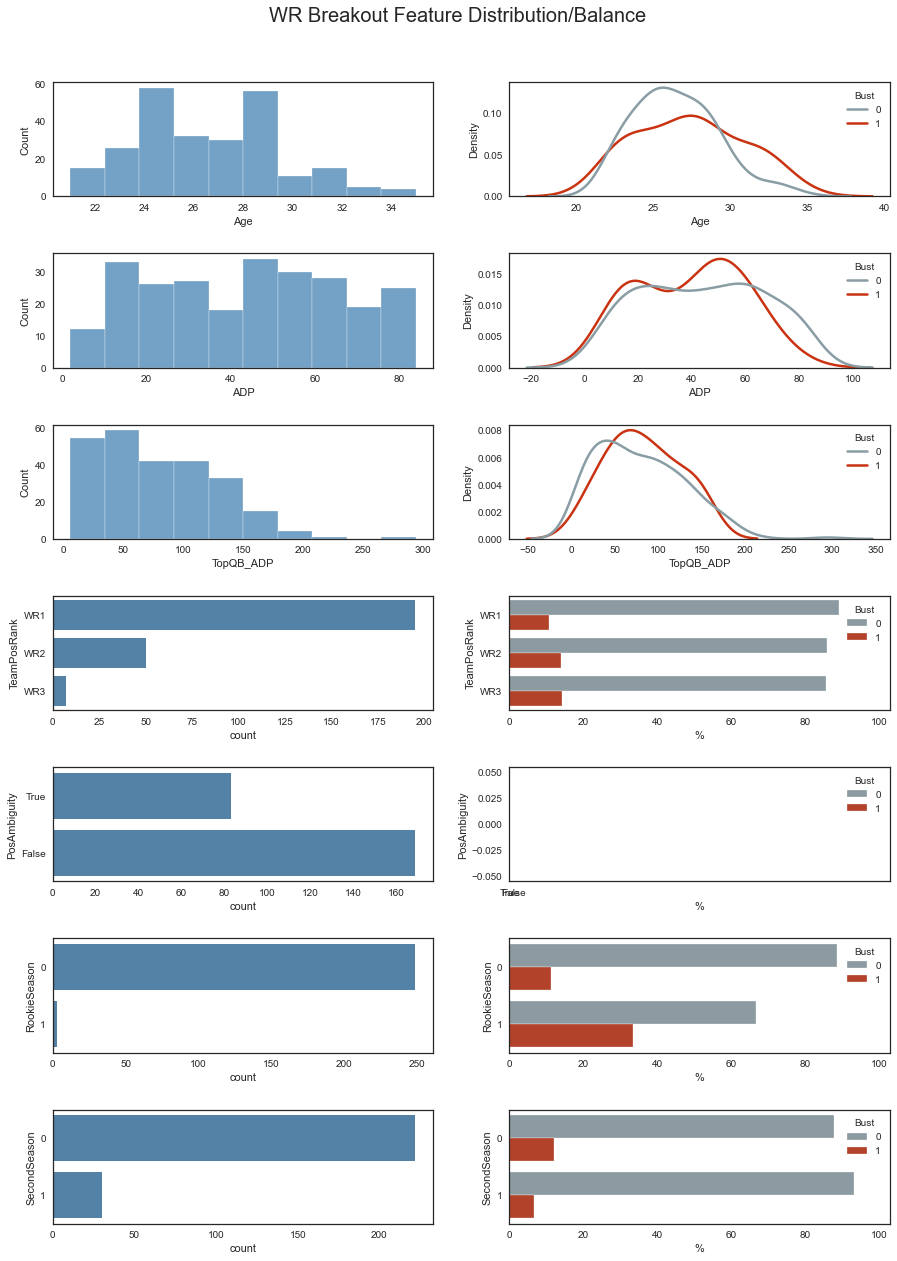

In [9]:
featurePlot(wr_DF, rb_or_wr='WR')

# Encoding Data

In [10]:
def encodeData(df, target):
    x, y = xy_split(df, target=target, to_numpy=False)
    x = encodeCategories(x)
    x[target] = y
    return x

# Encode each data set
rb_encoded_DF = encodeData(rb_DF, target='Bust')
wr_encoded_DF = encodeData(wr_DF, target='Bust')

# Convert binary integers to floats
rb_encoded_DF = rb_encoded_DF.astype({'PosAmbiguity': 'float', 'RookieSeason': 'float', 'SecondSeason': 'float', 'Bust': 'float'})
wr_encoded_DF = wr_encoded_DF.astype({'PosAmbiguity': 'float', 'RookieSeason': 'float', 'SecondSeason': 'float', 'Bust': 'float'})

# Change TeamPosRank value and name for interpretability
rb_encoded_DF['TeamPosRank'] = rb_encoded_DF['TeamPosRank'].map({1.0: 0.0, 0.0: 1.0})
rb_encoded_DF.columns = ['Age','ADP','TeamPosRank_RB1','PosAmbiguity','RookieSeason','SecondSeason','TopQB_ADP','Bust']

# Join descriptive columns to encoded data
rb_output_DF = rb_data[['Year', 'FirstName', 'LastName', 'Team']].join(rb_encoded_DF, how='outer')
wr_output_DF = wr_data[['Year', 'FirstName', 'LastName', 'Team']].join(wr_encoded_DF, how='outer')

# Output encoded data sets
rb_output_DF.to_csv('./processed-data/rb-bust-data.encoded.csv', index=False)
wr_output_DF.to_csv('./processed-data/wr-bust-data.encoded.csv', index=False)


Encoding categorical features...

TeamPosRank encoded as binary
   0: RB1
   1: RB2

Encoding categorical features...

TeamPosRank one-hot-encoded

